In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [2]:
def comb(n, r):
    return int(math.factorial(int(n)) / (math.factorial(int(r)) * math.factorial(int(n - r))))

In [3]:
def generate_graph(n_nodes, conn_prob):
    graph = [[] for n in range(n_nodes)]
    
    # A graph contains at most nC2 edges
    probabilities = np.random.rand(comb(n_nodes, 2))
    count = 0
    for i in range(n_nodes):
        for j in range(i + 1, n_nodes):
            if probabilities[count] < conn_prob:
                graph[i].append(j)
                graph[j].append(i)
                
            count += 1
                
    return graph
    

In [4]:
def bfs(graph, source):
    visited = [False] * len(graph)
    visited[source] = True
    
    queue = [source]
    
    while len(queue) != 0:
        current = queue.pop(0)
        for adjacent in graph[current]:
            if not visited[adjacent]:
                visited[adjacent] = True
                queue.append(adjacent)
                
    return np.array(visited)

In [5]:
def get_n_components(graph, source=0):
    all_visited = False
    components = 0
    
    current_visited = np.array([False] * len(graph))
    
    while not all_visited:
        visited = bfs(graph, source)
        current_visited = current_visited | visited
        if not (False in current_visited):
            all_visited = True 
        else:
            source = np.where(current_visited == False)[0][0]
        components += 1
        
    return components    

In [6]:
TESTS = 30
NODES = 1000

In [7]:
probabilities = []
probs_range = np.arange(0.001, 0.021, 0.001)

for prob in tqdm(probs_range):
    n_connected = 0
    tests_components = []
    for n_test in range(TESTS):
        graph = generate_graph(NODES, prob)
        
        test_components = get_n_components(graph)
        tests_components.append(test_components)
        
        if (test_components == 1):
            n_connected += 1
            
    probabilities.append(n_connected / TESTS)

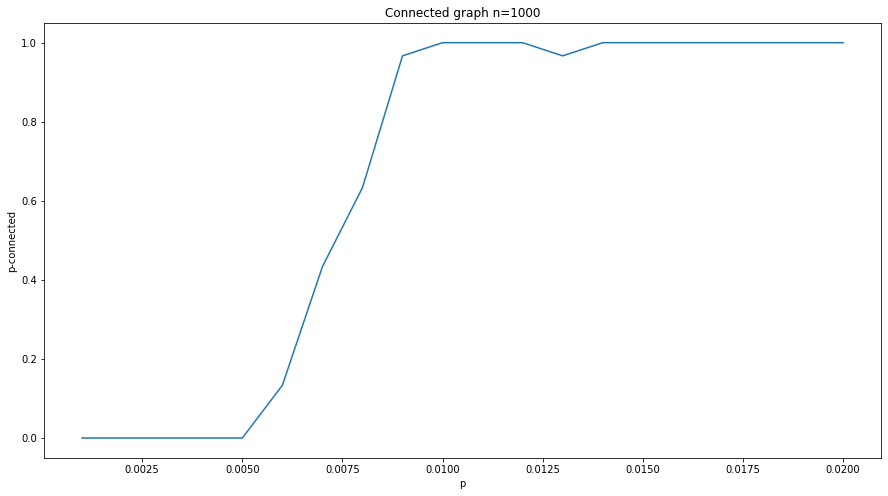

In [8]:
plt.figure(figsize=(15, 8))

plt.xlabel('p')
plt.ylabel('p-connected')
plt.title('Connected graph n={}'.format(NODES))

plt.plot(probs_range, probabilities)

plt.show()
plt.close()